In [16]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#RouteLinkNC = nc.Dataset('/home/user/Downloads/eHydro/RouteLink_CONUS.nc')
RouteLinkNC = nc.Dataset('/home/dongha.kim/github/t-route/src/python_routing_v02/troute/routing/RouteLink_CONUS.nc')
#inland_bathyNC = nc.Dataset('/home/user/Downloads/eHydro/eHydro_ned_cross_sections_2021_11_22.nc')
#inland_bathyNC = nc.Dataset('/home/dongha.kim/github/t-route/src/python_routing_v02/troute/routing/eHydro_ned_cross_sections_2021_11_22.nc')
inland_bathyNC = nc.Dataset('/home/dongha.kim/github/t-route/src/python_routing_v02/troute/routing/eHydro_ned_cross_sections_2021_12_29.nc')

In [17]:
print(inland_bathyNC)
print(RouteLinkNC)


/home/dongha.kim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  """Entry point for launching an IPython kernel.


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: Natural cross section data for inland routing task
    date_scraped: eHydro data scraped on 2021-11-01
    date_generated: database generated on  2021_12_29
    code_repo: https://github.com/JamesColl-NOAA/eHydRo
    contact: james.coll@noaa.gov
    projection: epsg:6349
    dimensions(sizes): xid(23419)
    variables(dimensions): int32 xid(xid), float64 xid_length(xid), int32 comid(xid), float64 comid_rel_dist_ds(xid), float64 xid_d(xid), float64 x(xid), float64 y(xid), float64 z(xid), float64 n(xid), int32 source(xid)
    groups: 


/home/dongha.kim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Convention: CF-1.6
    featureType: timeSeries
    processing_notes: This file was produced Fri Apr 12 07:16:15 2019 by Kevin Sampson (NCAR) and has the following attributes: 
   This file uses the NHDPlus v21 "flattened" geodatabase: NHDPlusV21_National_Flattened.gdb.
   This file excludes reaches in Puerto Rico and Hawaii.
   Routing using Arc-Hydro derived segments for Regions 01a, 02b, 09a, 10i, 10h, 13a, 13b, 13d, 15a, 15b, 17b, 18a.
   Topology fixes using: Topology_Fixer.csv.
   NHDFlowlines removed using: Remove_COMIDs_NHDFLowline_Network.csv.
   Gage preference list: numberOf100QualityObs.2017-03-15.csv.
   Gage subset list: numberOf100QualityObs.2017-03-15.csv.
   Gage additions made using: Add_Gage_Association.csv.
   Gage-to-flowline association changes made using: Bad_Gage_Associations.csv.
   Tidal-influenced gages removed using: TidalGageList_20170316.csv.
   Waterbody assoc

In [18]:
import numpy
numpy.version.version


'1.21.2'

In [19]:
# To get the list of COMID's that exist within the dataset
print(np.unique(inland_bathyNC['comid'][:]))


/home/dongha.kim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


[ 19667313  19667341  19667423  19667933  19667939  19667945  19667951
  19667997  19668003  19668005  19668007  19668119  19668141  19670801
  19670835  19670841  19670845  19675967  19676071  19676595  19676603
  19678009  19678033  19678035  19678055  19678059  19678063  19678065
  19678111  19678115  19678137  19678151  19678163  19678169  19678175
  19678181  19678191  19678201  19678215  19678221  19678227  19678239
  19678245  19678257  19678265  19678275  19678281  19678303  19678307
  19678311  19678317  19678319  19678341  19678343  19678351  19678363
  19678581  19678613  19685775  19692849  19692891  19692997  19693033
  19693051  19693063  19693199  19693227  19693645  19694389  19695031
  19695469  19695479  19695481  19695483  19695503  19695505  19695511
  19695565  19695887  19695949  19696125  19696479  19696497  19697233
  19697475  19697707  19697763  19697867  19697869  19697943  19697961
  19697971  19697973  19698109  19698229  19698273  19698275  19698361
  1969

In [20]:
## How many cross sections are associated with a given comid? 
## (should be 1 based on the current workflow but as am example)

#given_comid = np.unique(inland_bathyNC['comid'][:])[1:4]
given_comid = np.unique(inland_bathyNC['comid'][:])[1:4]
print(given_comid)

[19667341 19667423 19667933]


/home/dongha.kim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [7]:
#inland_bathyNC['xid'][14191085][:][:]
#inland_bathyNC['comid'][:]

#bathy['xid'][bathy['comid']==given_comid]


In [21]:
# Create an empty dataframe to push arrays to
import numpy.ma as ma
inland_bathyDF = pd.DataFrame()
inland_bathyDF['comid'] =  pd.DataFrame(np.ma.filled(inland_bathyNC['comid'][:]))
inland_bathyDF['x_bathy'] =  pd.DataFrame(np.ma.filled(inland_bathyNC['xid_d'][:]))
inland_bathyDF['z_bathy'] =   pd.DataFrame(np.ma.filled(inland_bathyNC['z'][:]))
inland_bathyDF['n'] =   pd.DataFrame(np.ma.filled(inland_bathyNC['n'][:]))
#inland_bathyDF_subset = inland_bathyDF[inland_bathyDF['comid'] == given_comid[2]]
#print(inland_bathyDF_subset.iloc[1])
#print(inland_bathyDF_subset['x_bathy'].iloc[2])
#print(inland_bathyDF_subset['z_bathy'])


/home/dongha.kim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/home/dongha.kim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/home/dongha.kim/anaconda3/lib/python3.7/site-packages/i

In [33]:
sizelist=[]
#for i in range(0,3):
if 1==1:    
    inland_bathyDF_subset = inland_bathyDF[inland_bathyDF['comid'] == given_comid[1]]
    size= inland_bathyDF_subset['x_bathy'].size
    sizelist.append(size)
sizelist
maxsize=max(sizelist)
maxsize
print(given_comid[2])


19667933


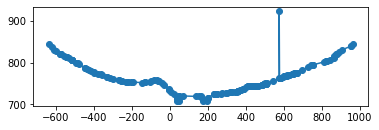

178


In [34]:
x = inland_bathyDF_subset [['x_bathy']]
y = inland_bathyDF_subset [['z_bathy']]
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.scatter(x,y)
ax.plot(x,y)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

plt.show()
print(x.size)

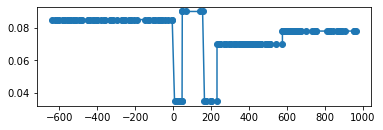

In [35]:
x = inland_bathyDF_subset [['x_bathy']]
n = inland_bathyDF_subset [['n']]
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.scatter(x,n)
ax.plot(x,n)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

plt.show()


In [ ]:
# Note: The eHydro cross sections can look pretty awful, the usace ones (source=2) look better

# Join the NWM routelink to the inland_bathy data
RouteLinkDF = pd.DataFrame()
RouteLinkDF['link'] =  pd.DataFrame(np.ma.filled(RouteLinkNC['link'][:]))
RouteLinkDF['BtmWdth'] =  pd.DataFrame(np.ma.filled(RouteLinkNC['BtmWdth'][:]))
RouteLinkDF['ChSlp'] =  pd.DataFrame(np.ma.filled(RouteLinkNC['ChSlp'][:]))
RouteLinkDF['TopWdthCC'] =  pd.DataFrame(np.ma.filled(RouteLinkNC['TopWdthCC'][:]))
RouteLinkDF['TopWdth'] =  pd.DataFrame(np.ma.filled(RouteLinkNC['TopWdth'][:]))
RouteLinkDF['TopWdth'] =  pd.DataFrame(np.ma.filled(RouteLinkNC['TopWdth'][:]))
RouteLinkDF['to'] =  pd.DataFrame(np.ma.filled(RouteLinkNC['to'][:]))
#inland_bathyDF_subset = pd.merge(inland_bathyDF_subset, RouteLinkDF,how='left', left_on='comid', right_on='link')
#print(inland_bathyDF_subset)

RouteLinkDF_subset = RouteLinkDF[RouteLinkDF['link'] == given_comid]
RouteLinkDF_subset

In [ ]:
inland_bathyDF_subset = inland_bathyDF[inland_bathyDF['comid'] == given_comid]

In [ ]:
# Plotting a cross section
given_xid = np.unique(inland_bathyNC['xid'][:])
print(given_xid)
given_xid = np.unique(inland_bathyNC['xid'][:])[5]
print(given_xid)

In [ ]:
# Create an empty dataframe to push arrays to
inland_bathy_cross_sections = pd.DataFrame()
inland_bathy_cross_sections['xid'] =  pd.DataFrame(np.ma.filled(inland_bathyNC['xid'][:]))
inland_bathy_cross_sections['comid'] =  pd.DataFrame(np.ma.filled(inland_bathyNC['comid'][:]))
inland_bathy_cross_sections['xid_d'] =  pd.DataFrame(np.ma.filled(inland_bathyNC['xid_d'][:]))
inland_bathy_cross_sections['z'] =  pd.DataFrame(np.ma.filled(inland_bathyNC['z'][:]))
inland_bathy_cross_sections_subset = inland_bathy_cross_sections[inland_bathy_cross_sections['xid'] == given_xid]
print(inland_bathy_cross_sections_subset)


In [ ]:
# I get a weird axis sacling when ploting normally, so this is a weird way to get these to plot
x = inland_bathy_cross_sections_subset[['xid_d']]
y = inland_bathy_cross_sections_subset[['z']]
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.scatter(x,y)
ax.plot(x,y)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

plt.show()

In [ ]:
x

In [ ]:
# Note: The eHydro cross sections can look pretty awful, the usace ones (source=2) look better

# Join the NWM routelink to the inland_bathy data
RouteLinkDF = pd.DataFrame()
RouteLinkDF['link'] =  pd.DataFrame(np.ma.filled(RouteLinkNC['link'][:]))
RouteLinkDF['BtmWdth'] =  pd.DataFrame(np.ma.filled(RouteLinkNC['BtmWdth'][:]))
RouteLinkDF['ChSlp'] =  pd.DataFrame(np.ma.filled(RouteLinkNC['ChSlp'][:]))
RouteLinkDF['TopWdthCC'] =  pd.DataFrame(np.ma.filled(RouteLinkNC['TopWdthCC'][:]))
RouteLinkDF['TopWdth'] =  pd.DataFrame(np.ma.filled(RouteLinkNC['TopWdth'][:]))

inland_bathy_cross_sections = pd.merge(inland_bathy_cross_sections, RouteLinkDF,how='left', left_on='comid', right_on='link')
print(inland_bathy_cross_sections)

In [ ]:
mx_jorder=4
for x in range(mx_jorder, -1, -1):
    print(x)
    